Name: Aysun Urhan

I hereby declare that I observed the honour code of the university when preparing the homework.

# Solution to 16.3-5 and 18

## Q16* Time Series Modeling
In the following figures, observations $y_t$ from two processes are given as a function of time index t.
Observations are known to be discrete with $y_t \in $ {1, . . . , 30}. For each realisation, define a plausible
process that would generate similar realisations. Define the appropriate latent variables (if you
use any), draw the graphical model and provide the conditional probability tables and/or state
transition diagrams.

### 3. Process 3


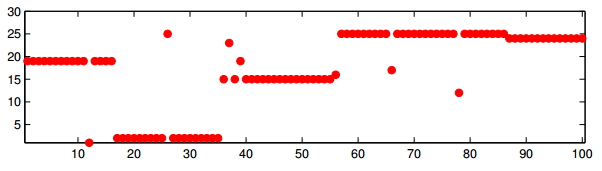

In [1]:
from IPython.display import Image
Image(filename='process3.png') 

$P(y_{t},\ y_{t-1})$ | $y_{t-1}$ 
:---------------------: | :---------------------:
$$S_t=S_{t-1}$$         | p
$$S_t= u$$              | 1-p

Where 
$$ S_t \in \{0,\ 30\} $$
$$u \sim \mathcal{N}(15, 5)$$

The following graphical model is valid for process 3, 4 and 5.

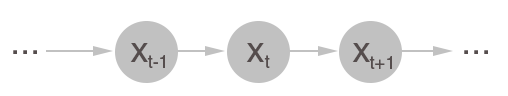

In [3]:
Image(filename = 'chainGraph.png')

### 4. Process 4

$$ abcdeabcaabcdeeeeabcababcdabc $$
Where
$$ x_t \in \{a, b, c, d, e\}$$


Joint Probability Table:

P($x_{t-1}$ , $x_{t}$)     | $x_{t}$ = $a$ | $x_{t}$ = $b$ | $x_{t}$ = $c$ | $x_{t}$ = $d$ | $x_{t}$ = $e$
:-----------------------:  | ----------- | ----------- |------------ | ----------- | ----------- |
$x_{t-1}$ = $a$            | 1/28 | 7/28 |0|0|0
$x_{t-1}$ = $b$             | 1/28 | 6/28 |0|0|0
$x_{t-1}$ = $c$             | 2/28 | 3/28 |0|0|0
$x_{t-1}$ = $d$             | 1/28 |0|0|0| 2/28
$x_{t-1}$ = $e$             | 2/28 |0|0|0| 3/28

Transition Table:

$$P(x_t |\ x_{t-1})$$     | $x_{t}\ =a$ | $$x_{t}=b$$ | $$x_{t}=c$$ | $$x_{t}=d$$ | $$x_{t}=e$$
-----------------------    | ----------- | ----------- |------------ | ----------- | ----------- |
$$x_{t-1} = a $$             | 1/8 | 7/8 |0|0|0
$$x_{t-1} = b $$             | 1/7 | 6/7 |0|0|0
$$x_{t-1} = c $$             | 2/5 | 3/5 |0|0|0
$$x_{t-1} = d $$             | 1/3 |0|0|0| 2/3
$$x_{t-1} = e $$             | 2/5 |0|0|0| 3/5

### 5. Process 5

$$1110001111000111100001110001111000011110001111$$
Where
$$x_t \in \{1, 0\}$$

P($x_{t-1}$ , $x_{t}$)      | $x_{t}$ = $0$ | $x_{t}$ = $1$ 
-----------------------    | ----------- | ----------- 
$x_{t-1}$ = $0$             | 14/45 | 6/45 
$x_{t-1}$ = $1$             | 6/45 | 19/45 

## Q18*: Chest Clinic

A distribution factorises according to the following factorisation

### 1. Draw the corresponding directed graphical model



$P(A, M, T, L, B, F, D, X) = P(F\ |\ T, L)\cdot P(T\ |\ A)\cdot P(B\ |\ M)\cdot P(X\ |\ F)\cdot P(L\ |\ M)\cdot P(D\ |\ F, B)\cdot P(A)\cdot P(M)$

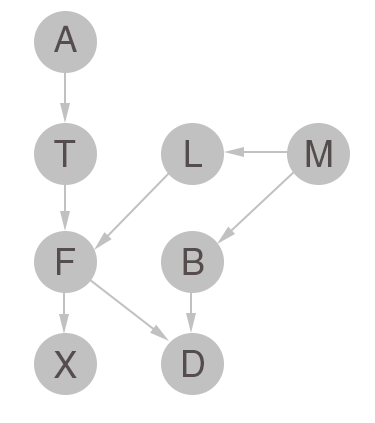

In [4]:
Image(filename='DAG.png') 


### 2. Draw an equivalent factor graph and undirected graphical model

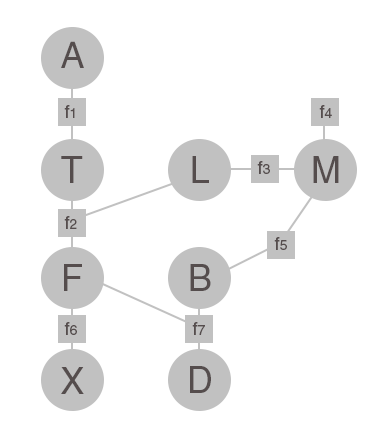

In [5]:
Image(filename='Factor.png') 

Where,

$$f_1 = p(T\ |\ A)\cdot p(A)$$
$$f_2 = p(F\ |\ T,\ L)$$
$$f_3 = p(L\ |\ M)$$
$$f_4 = p(M)$$
$$f_5 = p(B\ |\ M)$$
$$f_6 = p(X\ |\ F)$$
$$f_3 = p(D\ |\ F,\ B)$$

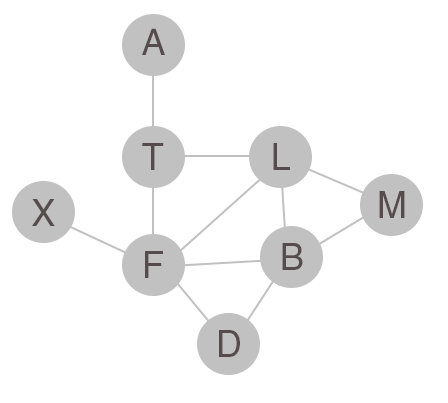

In [6]:
Image(filename='Undirected.png') 

### 3. If all the variables have N states, compute the space to store the model specification.

$ \underbrace{P(F|\ T, L)}_\text{$(N-1)N^2$} \cdot \underbrace{P(M)}_\text{$(N-1)$} \cdot \underbrace{P(T|A)}_\text{$(N-1)N$} \cdot \underbrace{P(B|M)}_\text{$(N-1)N$} \cdot \underbrace{P(X|F)}_\text{$(N-1)N$} \cdot \underbrace{P(L|M)}_\text{$(N-1)N$} \cdot \underbrace{P(D|\ F, B)}_\text{$(N-1)N^2$} \cdot \underbrace{P(A)}_\text{$(N-1)$} $

$ 2 \cdot (N-1) \cdot (N^2 + 2N + 1) = 2 \cdot (N-1) \cdot (N+1)^2 $

### 4. Verify the following conditional independence statements using d-separation. State if they are true or false and explain why.

a) $A \perp M \ |\ \emptyset$

In the asbence of any observation, the path between two parent nodes, A and M is blocked hence they are d-separated and unconditionally indipenedent. 

b) $A \perp M \ |\ X$

Once x is observed, the path; A-T-F-L-M becomes unlocked. Thus, A and M are conditionally independent, given X. 

c) $T \perp L \ |\ X$ 

Similar to part b, once X is observed, two parents of F; T and L become d-seperated since the path is now unlocked. Thus T and L are conditionally independent, given X.

d) $X \perp L \ |\ F$ 

In this case, the parent node of X, F is observed, therefore the path from X to L becomes unlocked, and X and L become d-separated. Given F, X and L are conditionally independent.

e) $X \perp L \ |\ D$

This is exactly the same as the case in part d, since the child node of F, D is observed. The path from X to L becomes unlocked, and X and L are d-separated. Thus, given D, X and L are conditionally independent.

# Programming Homework 3

In this exercise we model a string of text using a Markov(1) model. For simplicity we only consider letters 'a-z'. Capital letters 'A-Z' are mapped to the corresponding ones. All remaining letters, symbols, numbers, including spaces, are denoted by '.'.


We have a probability table $T$ where $T_{i,j} = p(x_t = j | x_{t-1} = i)$  transition model of letters in English text for $t=1,2 \dots N$. Assume that the initial letter in a string is always a space denoted as $x_0 = \text{'.'}$. Such a model where the probability table is always the same is sometimes called a stationary model.

1. For a given $N$, write a program to sample random strings with letters $x_1, x_2, \dots, x_N$ from $p(x_{1:N}|x_0)$

In [7]:
import csv
import numpy as np
from array import *

alphabet = [chr(i+ord('a')) for i in range(26)]
alphabet.append('.')
letter2idx = {c:i for i,c in enumerate(alphabet)}
# print (letter2idx['a'])
T_list = []
with open('transitions.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        T_list.append(row)
        
T = np.array(T_list).astype("float")
# print(T[0, 0])
startingChar = "."

In [8]:
def cleanString (string_input):
    string_inputCleaned = []
    for i in range(0, len(string_input)):
        currString = string_input[i]
        currLength = len(string_input[i])
        for j in range(0, currLength):
            if currString[j] == '.':
                currString = currString[:j] + ' ' + currString[j+1:]
            if j == currLength-1:
                string_inputCleaned.append(currString)
    return string_inputCleaned

In [9]:
# This function will generate random text of length N, 
# using a first order Markov Chain and the transition matrix provided in the problem statement
def randomText (N, alphabet, T):
    randChain = '.'
    for i in range(1, N+1): 
        newProb = T[letter2idx[randChain[i-1]], :].copy()
        newProb /= newProb.sum()
        newChar = np.random.choice(alphabet, 1, p = newProb.copy())
        randChain += newChar[0]
    return randChain

In [27]:
from __future__ import print_function
# Example:
# Generate random text of length 50 (50 characters) using 1st order Markov Chain
genText = randomText(50, alphabet, T)
genTextCleaned = cleanString(genText)
for i in range(0, len(genText)):
    print (genTextCleaned[i], end="")

 e mmence mend anernur alstwad  pan inilonl sel the

2. Now suppose you are given strings with missing letters, where each missing letter is denoted by a question mark (or underscore, as below). Implement a method, that samples missing letters conditioned on observed ones, i.e., samples from $p(x_{-\alpha}|x_{\alpha})$ where $\alpha$ denotes indices of observed letters. For example, if the input is 't??.', we have $N=4$ and
$x_1 = \text{'t'}$ and $x_4 = \text{'.'}$, $\alpha=\{1,4\}$ and $-\alpha=\{2,3\}$. Your program may possibly generate the strings 'the.', 'twi.', 'tee.', etc. Hint: make sure to make use all data given and sample from the correct distribution. Implement the method and print the results for the test strings below. 

In [28]:
def missingLetters (string_input, alphabet, T):
    string_length = len(string_input)
    string_filled = []
    for i in range(0, string_length):
        # Program treats each string in the list separately
        currString = string_input[i]
        newString  = string_input[i]
        currLength = len(currString)
        if newString[0] == '_' or newString[0] == '?':
            # Check if the first character in the string is missing
            newProb = T[-1, :].copy()
            newProb /= newProb.sum()
            # Normalize the conditional probability, just in case
            # Missing character is replaced with a random sample taken from
            # the conditional probability distribution 
            newChar = np.random.choice(alphabet, 1, p = newProb.copy())
            newString = newString[:0] + newChar[0] + newString[1:]
            # Replace the missing letter symbol with the new sampled character
        for j in range(1, currLength):
            if newString[j] == '_' or newString[j] == '?':
                # Check if the current character in the string is missing
                newProb = T[letter2idx[newString[j-1]], :].copy()
                newProb /= newProb.sum()
                # Normalize the conditional probability, just in case
                # Missing character is replaced with a random sample taken from
                # the conditional probability distribution 
                newChar = np.random.choice(alphabet, 1, p = newProb.copy())
                newString = newString[:j] + newChar[0] + newString[j+1:] 
                # Replace the missing letter symbol with the new sampled character
        string_filled.append(newString)
    return string_filled


In [30]:
string_input = ['th__br__n.f_x.', '_u_st__n_.to_be._nsw_r__','i__at_._a_h_n_._e_r_i_g','q___t.___z._____t.__.___.__.']
string_filled = missingLetters(string_input, alphabet, T)
string_length = len(string_input)
string_inputCleaned = cleanString(string_input)
string_filledCleaned = cleanString(string_filled)

for i in range(0, string_length):
    print (string_inputCleaned[i], "--- Filling missing letters --->", string_filledCleaned[i])

th__br__n f_x  --- Filling missing letters ---> thizbrarn fix 
_u_st__n_ to_be _nsw_r__ --- Filling missing letters ---> ouestoyng tobbe tnswrris
i__at_ _a_h_n_ _e_r_i_g --- Filling missing letters ---> icoath aashonc me raing
q___t ___z _____t __ ___ __  --- Filling missing letters ---> qunet aspz ire ot rn wst ie 


3. Describe a method for filling in the gaps by estimating the most likely letter for each position. Hint: you need to compute
$$
x_{-\alpha}^* = \arg\max_{x_{-\alpha}} p(x_{-\alpha}|x_{\alpha})
$$
Implement the method and print the results for the following test strings along with the log-probability  $\log p(x_{-\alpha}^*,x_{\alpha})$.

In [31]:
def missingLettersMLE (string_input, alphabet, T):
    string_length = len(string_input)
    string_filled = []
    for i in range(0, string_length):
        # Program treats each string in the list separately
        currString = string_input[i]
        newString  = string_input[i]
        currLength = len(currString)
        if newString[0] == '_' or newString[0] == '?':
            # Check if the first character in the string is missing
            newProb = T[-1, :].copy()
            newProb /= newProb.sum()
            # Normalize the conditional probability, just in case
            dummy = np.where(newProb == newProb.max())
            # Find the MLE for the next current character, given the previous character
            newChar = alphabet[int(dummy[0])]
            newString = newString[:0] + newChar + newString[1:]
            # Replace the missing letter symbol with the MLE
        for j in range(1, currLength):
            if newString[j] == '_' or newString[j] == '?':
                # Check if the current character in the string is missing
                newProb = T[letter2idx[newString[j-1]], :].copy()
                newProb /= newProb.sum()
                # Normalize the conditional probability, just in case
                dummy = np.where(newProb == newProb.max())
                # Find the MLE for the next current character, given the previous character
                newChar = alphabet[int(dummy[0])]
                newString = newString[:j] + newChar + newString[j+1:] 
                # Replace the missing letter symbol with the MLE
        string_filled.append(newString)
    return string_filled


This time, instead of taking a random sample from the conditional probability distibution, the maximum likelihood estimate of the missing character is used. This method should give more reasonable results since this time, the missing character is replaced with its most probable estimate, given the previous character and it is not just some random sample.

In [32]:
string_input = ['th__br__n.f_x.', '_u_st__n_.to_be._nsw_r__','i__at_._a_h_n_._e_r_i_g','q___t.___z._____t.__.___.__.']
string_filledMLE = missingLettersMLE(string_input, alphabet, T)
string_length = len(string_input)

string_inputCleaned = cleanString(string_input)
string_filledMLECleaned = cleanString(string_filledMLE)

for i in range(0, string_length):
    print (string_inputCleaned[i], "--- Filling missing letters --->", string_filledMLECleaned[i])

th__br__n f_x  --- Filling missing letters ---> the bre n f x 
_u_st__n_ to_be _nsw_r__ --- Filling missing letters ---> tursthen  tonbe tnswhre 
i__at_ _a_h_n_ _e_r_i_g --- Filling missing letters ---> in ath tanhen  te reing
q___t ___z _____t __ ___ __  --- Filling missing letters ---> quret thez the tt th the th 


4. Discuss how you can improve the model to get better estimations.

Clearly, the first order Markov Chain is lacking in many ways as a model for predicting missing letters. We can identify the problems by breaking down the model into its components. A Markov model is basically made up of discrete states and the corresponding transitions between these states. The Markov property states that, if we denote the current state as the "present", the current state of the system depends only on the past states. This is a quite powerful assumption, in the sense that it dramatically simplifies the whole process of figuring out transition probabilities and the mathematics of modeling in general. Additionally, it is relatively easy to to understand the model and hence provided explanations (such as associations or maybe even causal relationships) for the real life data. However, if this assumption is not valid on the system of interest then the results of the model will more than likely be unsatisfactory.

In this homework, a transition matrix for English lanuage was given, and we were asked to build a first order Markov model to generate random text and also predict the missing letters in a given test string. There is no information on neither how the transition matrix was obtained nor how accurate it really is for English. That could be the first culprit, in the sense that perhaps there exists a better transition matrix for the purpose of modeling English language.

Second point to note is that we are restricted to using a first order Markov chain, meaning that the current state, the character in a string, depends only on the previous state, the character that came before it, and not on the older states of the system. It is more than likely that a higher order model would improve the predictions since it would be using more information at each evaluation, and this could lead to a better understanding of the context of the given string. For instance, think of the case when we need to fill out the particular string "th_" and the correct character of choice is "e". The model will only know the character that came before the underscore, "h". And in English there must be many instance where the character "h" is not followed by an "e", meaning that the probability $p(x_{t}=e \ | \ x_{t-1}=h)$ is not that high. However, if the model had known that before "h", we have a "t" then the probability $p(x_{t}=e \ | \ x_{t-1}=th)$ would be quite high since "the" is one of the most frequently used words in the English language and hence the model would have managed to predict the correct character.

In addition, all the punctuation marks are removed from the strings, and the transition table represents only the lowercase letters, and the character ".", which denotes either the beginning of a word or the space between two consecutive words. This is yet another limitation placed on the model; punctuation marks and capital letters convey important information about each letter in a given string. Punctuation, construction of a sentence and grammar are all integral parts of the process of "speaking", per se. And it is quite difficult to model these aspects of language just by looking at the previous character.   

One final point that should be taken into account is the fact that, when multiple missing letters appear one after another, there is the risk of build-up of error since each character is determined recursively based on the previous one. For instance, let's say we know the state of $x_{t-1}$ and we want to predict the states, $x_{t}, x_{t+1} and x_{t+2}$. In that case, the last two letters will not be predicted based on real data, instead the Markov chain will take the previous predictions as the input. Similar to ARX (Auto-regressive with exogenous input) modeling for one-step-ahead predictions, prediction error can build up with each consecutive prediction.
